In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import set_config
set_config(print_changed_only=False)

In [2]:
data=pd.read_excel('Online Retail.xlsx')

In [3]:
df=data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.shape

(541909, 8)

In [5]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
countrywise_customers=df[['Country','CustomerID']].drop_duplicates()

In [10]:
countrywise_customers.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [12]:
df1=df[df['Country']=='United Kingdom']

In [18]:
df1=df1.reset_index(drop=True)

In [20]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [21]:
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [22]:
df1.shape

(495478, 8)

In [23]:
df1=df1.dropna(axis=0)

In [24]:
df1.shape

(361878, 8)

In [25]:
df1.Quantity.min()

-80995

In [26]:
df1.UnitPrice.min()

0.0

In [27]:
df1=df1[df1['Quantity']>0]
df1.shape

(354345, 8)

In [30]:
df1.InvoiceDate.dtype

dtype('<M8[ns]')

In [32]:
df1['Amount']=df1['Quantity']*df1['UnitPrice']

In [33]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [34]:
import datetime as dt

In [36]:
df1.InvoiceDate.min()

Timestamp('2010-12-01 08:26:00')

In [37]:
df1.InvoiceDate.max()

Timestamp('2011-12-09 12:49:00')

In [38]:
Latest_Date=dt.datetime(2011,12,10)

In [40]:
df_RFM=df1.groupby('CustomerID').agg({'InvoiceDate': lambda x:(Latest_Date-x.max()).days,
                                     'InvoiceNo' : lambda x:len(x),
                                     'Amount': lambda x:x.sum()})

In [41]:
df_RFM.head()

,InvoiceDate,InvoiceNo,Amount
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [42]:
df_RFM['InvoiceDate'].dtype

dtype('int64')

In [44]:
df_RFM=df_RFM.rename(columns={'InvoiceDate':'Recency',
                             'InvoiceNo':'Frequency',
                             'Amount':'Monetary'})

In [45]:
df_RFM.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [46]:
df_RFM=df_RFM.reset_index()
df_RFM.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [48]:
df_RFM['Recency'].describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

C:\Users\KS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Recency', ylabel='Density'>

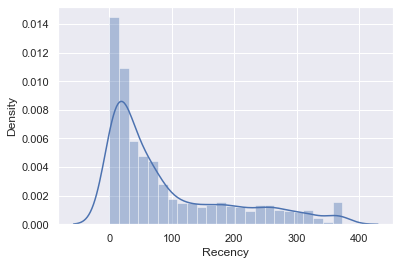

In [50]:
sns.distplot(df_RFM['Recency'])

In [51]:
df_RFM['Frequency'].describe()

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

C:\Users\KS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Frequency', ylabel='Density'>

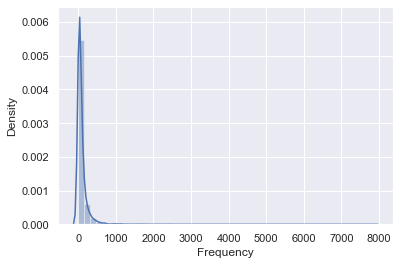

In [52]:
sns.distplot(df_RFM['Frequency'])

In [53]:
df_RFM['Monetary'].describe()

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Monetary, dtype: float64

C:\Users\KS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monetary', ylabel='Density'>

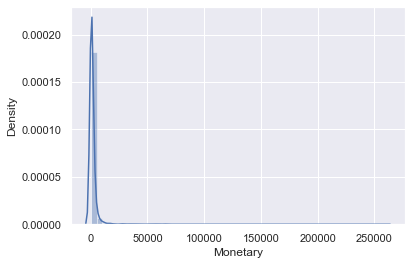

In [54]:
sns.distplot(df_RFM['Monetary'])

In [55]:
## Arguments (x=value,p=recency,frequency or monetary value,d=quantiles dict)

## lower the recency better the result

def RScore(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

## Higher the frequency better the result

def FScore(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4
    
    
## higher the monetary better the result

def MScore(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4

In [56]:
## quantile is like 25% , 50% and 75% level of values. example if we have 100 values first 25 in 1st quartile 25% 
## then second contain next 25% which is 50% and there after next 25% which is 75% and 4th quartile is more than 75% 

quantiles = df_RFM.quantile(q=[0.25,0.5,0.75])
quantiles

,CustomerID,Recency,Frequency,Monetary
0.25,14208.0,17.0,17.0,300.04
0.50,15569.0,50.0,41.0,651.82
0.75,16913.0,142.0,99.0,1575.89


In [57]:
quantiles.to_dict()

{'CustomerID': {0.25: 14208.0, 0.5: 15569.0, 0.75: 16913.0},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89}}

In [58]:
df_RFM['R_quartile']=df_RFM['Recency'].apply(RScore,args=('Recency',quantiles))
df_RFM['F_quartile']=df_RFM['Frequency'].apply(FScore,args=('Frequency',quantiles))
df_RFM['M_quartile']=df_RFM['Monetary'].apply(MScore,args=('Monetary',quantiles))

In [59]:
df_RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,12346.0,325,1,77183.60,1,1,4
1,12747.0,2,103,4196.01,4,4,4
2,12748.0,0,4596,33719.73,4,4,4
3,12749.0,3,199,4090.88,4,4,4
4,12820.0,3,59,942.34,4,3,3


In [60]:
df_RFM['RFM_score']=df_RFM.R_quartile.map(str)+df_RFM.F_quartile.map(str)+df_RFM.M_quartile.map(str)
df_RFM.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_score
0,12346.0,325,1,77183.60,1,1,4,114
1,12747.0,2,103,4196.01,4,4,4,444
2,12748.0,0,4596,33719.73,4,4,4,444
3,12749.0,3,199,4090.88,4,4,4,444
4,12820.0,3,59,942.34,4,3,3,433


In [75]:
print("Best Customers: ",len(df_RFM[df_RFM['RFM_score']=='444']))
print('Loyal Customers: ',len(df_RFM[df_RFM['F_quartile']==4]))
print("Big Spenders: ",len(df_RFM[df_RFM['M_quartile']==4]))
print('Almost Lost: ', len(df_RFM[df_RFM['RFM_score']=='144']))
print('Lost Customers: ',len(df_RFM[df_RFM['RFM_score']=='114']) +len(df_RFM[df_RFM['RFM_score']=='113'])
     +len(df_RFM[df_RFM['RFM_score']=='112']))
print('Lost Cheap Customers: ',len(df_RFM[df_RFM['RFM_score']=='111']))

Best Customers:  409
Loyal Customers:  980
Big Spenders:  980
Almost Lost:  20
Lost Customers:  135
Lost Cheap Customers:  343


In [76]:
df_RFM.groupby('RFM_score')['CustomerID'].count()

RFM_score
111    343
112    104
113     23
114      8
121     90
      ... 
434     78
441      1
442     16
443     81
444    409
Name: CustomerID, Length: 61, dtype: int64

In [77]:
df_RFM.groupby('RFM_score')['Monetary'].mean()

RFM_score
111      152.297055
112      377.129135
113      898.984783
114    21570.007500
121      195.643222
           ...     
434     4469.872436
441      272.440000
442      496.658125
443     1121.406667
444     8218.150196
Name: Monetary, Length: 61, dtype: float64

Text(0, 0.5, 'Mean Monetary Value')

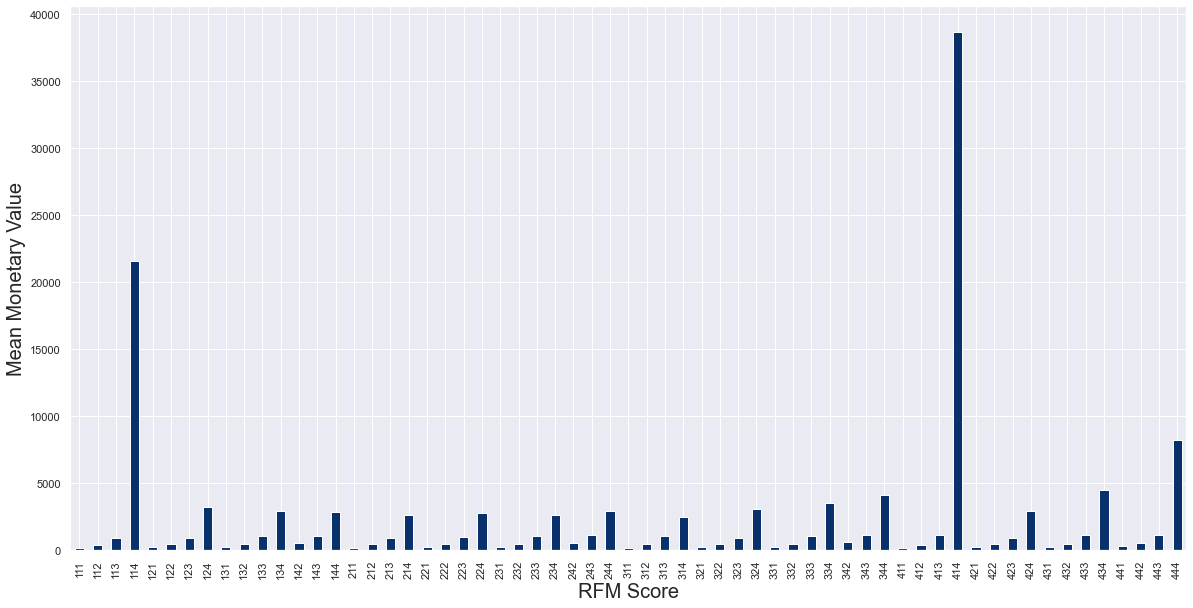

In [98]:
plt.figure(figsize=(20,10))
df_RFM.groupby('RFM_score')['Monetary'].mean().plot(kind='bar', colormap='Blues_r')
plt.xlabel('RFM Score',size=20)
plt.ylabel('Mean Monetary Value',size=20)


In [78]:
df_RFM.groupby('RFM_score')['Recency'].mean()

RFM_score
111    257.900875
112    253.413462
113    240.304348
114    240.750000
121    249.833333
          ...    
434      8.000000
441      4.000000
442     10.312500
443      8.172840
444      6.577017
Name: Recency, Length: 61, dtype: float64

Text(0, 0.5, 'Mean Recency Value')

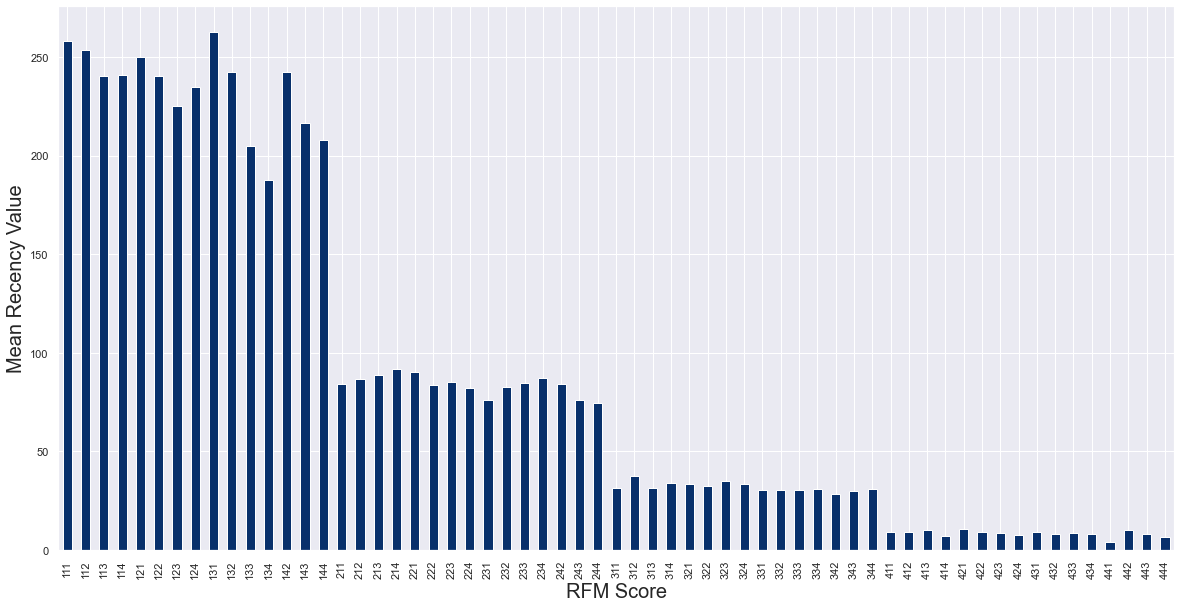

In [101]:
plt.figure(figsize=(20,10))
df_RFM.groupby('RFM_score')['Recency'].mean().plot(kind='bar', colormap='Blues_r')
plt.xlabel('RFM Score',size=20)
plt.ylabel('Mean Recency Value',size=20)

In [79]:
df_RFM.groupby('RFM_score')['Frequency'].mean()

RFM_score
111      8.061224
112     10.576923
113      7.739130
114      6.625000
121     26.522222
          ...    
434     75.166667
441    112.000000
442    131.812500
443    186.160494
444    363.684597
Name: Frequency, Length: 61, dtype: float64

Text(0, 0.5, 'Mean Frequency Value')

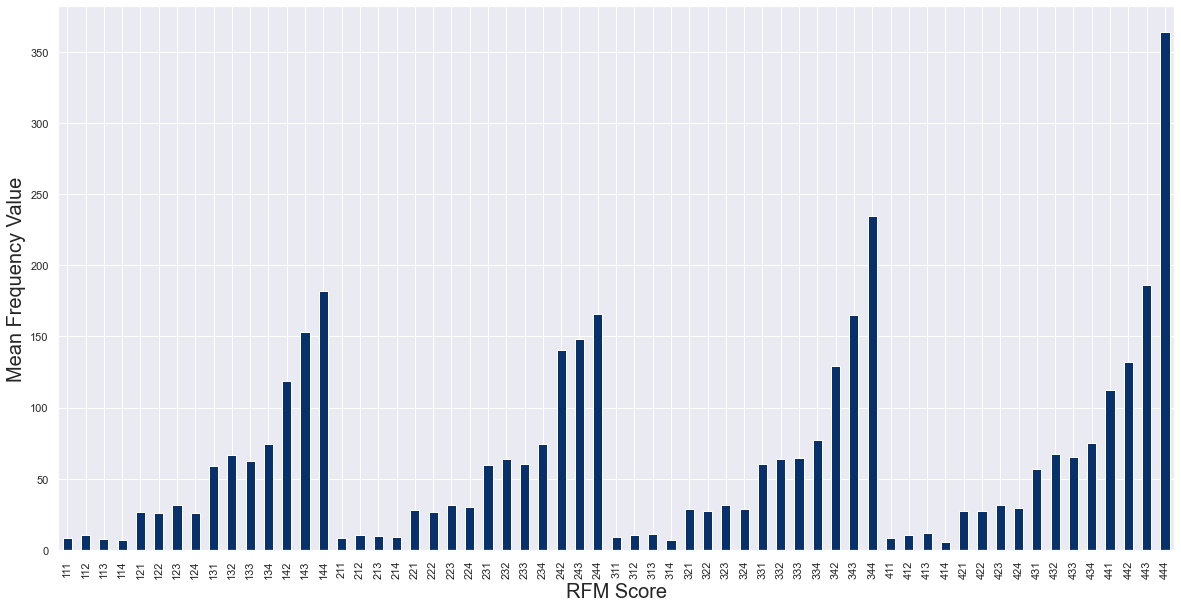

In [100]:
plt.figure(figsize=(20,10))
df_RFM.groupby('RFM_score')['Frequency'].mean().plot(kind='bar', colormap='Blues_r')
plt.xlabel('RFM Score',size=20)
plt.ylabel('Mean Frequency Value',size=20)

In [106]:
df2=df_RFM[['Recency','Frequency','Monetary']]

In [107]:
df2.head()

,Recency,Frequency,Monetary
0,325,1,77183.60
1,2,103,4196.01
2,0,4596,33719.73
3,3,199,4090.88
4,3,59,942.34


In [108]:
from sklearn.cluster import KMeans

In [109]:
from sklearn.preprocessing import StandardScaler

In [112]:
scaler=StandardScaler()

In [113]:
X_scaled=scaler.fit_transform(df2)
X_scaled

array([[ 2.34412669e+00, -4.10395112e-01,  1.00681742e+01],
       [-9.01587778e-01,  5.79924468e-02,  3.11737714e-01],
       [-9.21685081e-01,  2.06900052e+01,  4.25824834e+00],
       ...,
       [-8.51344520e-01, -3.59882729e-01, -2.25353203e-01],
       [-8.91539127e-01,  3.05659123e+00,  3.08743313e-02],
       [-4.99641715e-01, -9.35447047e-02, -3.55971486e-03]])

In [157]:
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=60)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

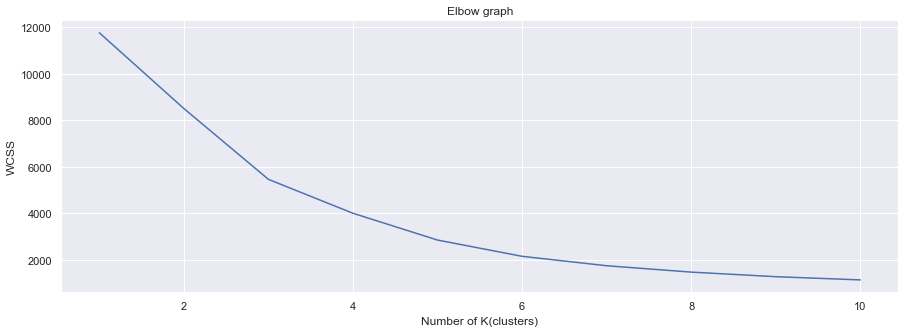

In [158]:
plt.figure(figsize=(15,5))
plt.plot(range(1,11),wcss)
plt.title('Elbow graph')
plt.xlabel('Number of K(clusters)')
plt.ylabel('WCSS')
plt.show()

In [159]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=60)

In [160]:
Y=kmeans.fit_predict(X_scaled)

In [161]:
clusters=kmeans.cluster_centers_

In [162]:
kmeans.labels_

array([2, 0, 2, ..., 0, 0, 0])

In [163]:
df2['Label']=kmeans.labels_

<ipython-input-163-535dfd323c63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Label']=kmeans.labels_


In [164]:
df2.head()

,Recency,Frequency,Monetary,Label
0,325,1,77183.60,2
1,2,103,4196.01,0
2,0,4596,33719.73,2
3,3,199,4090.88,0
4,3,59,942.34,0


In [165]:
df2.Label.value_counts()

0    2924
1     982
2      15
Name: Label, dtype: int64

C:\Users\KS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency', ylabel='Monetary'>

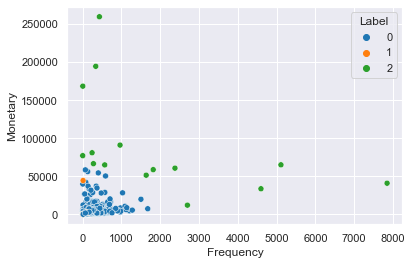

In [173]:
sns.scatterplot(df2['Frequency'],df2['Monetary'],hue='Label',palette='tab10',data=df2)


C:\Users\KS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='Recency'>

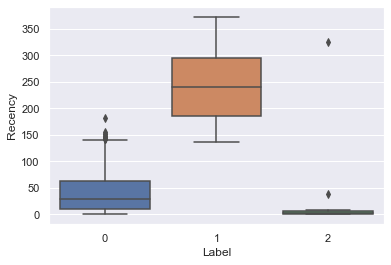

In [167]:
sns.boxplot(df2.Label,df2.Recency)

C:\Users\KS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='Frequency'>

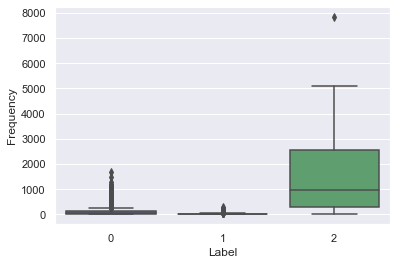

In [168]:
sns.boxplot(df2.Label,df2.Frequency)

C:\Users\KS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


''

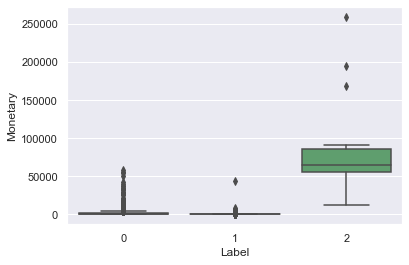

In [170]:
sns.boxplot(df2.Label,df2.Monetary)
;

In [171]:
## group them in platinum gold and silver  category

## 1- Platinum Category-  we see that the customers with label 2 are recent visitors and have higher freequency and have high monetory value so they fall in Platinum label

## 2- Gold category-  we see that the customers with label 0 have relative better recency than customers of label 1 and they have better frequency than customers of label 1 and monetary value is also better than them so they fall in our gold category

## 3- Silver Category- rest customers with label 1 are from silver category as their recency is not that good and same with other 2 categories